# <font color = "purple">Evaluating Regression Model Exercises

- Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.



In [4]:
#warnings
import warnings
warnings.filterwarnings("ignore")

#Python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pydataset import data

#Linear model
from statsmodels.formula.api import ols


### 1. Load the tips dataset from either pydataset or seaborn.



In [18]:
df =sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [20]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [27]:
#set x & y
x = df['total_bill']
y = df['tip']

In [22]:
#set baseline
df['baseline'] = df.tip.mean()
df.baseline

0      2.998279
1      2.998279
2      2.998279
3      2.998279
4      2.998279
         ...   
239    2.998279
240    2.998279
241    2.998279
242    2.998279
243    2.998279
Name: baseline, Length: 244, dtype: float64

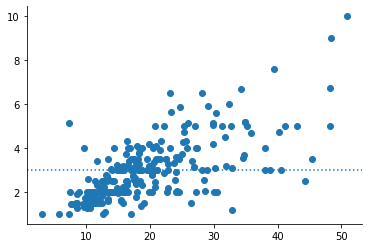

In [23]:
#Plot w/ set baseline
# plot data with baseline:
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

**Here is some sample code to get you started:**

```python
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)
```

The code above fits a linear regression model on the df dataset, using column `y` as the target and column `x` as the predictor. Modify the code as necessary to work with the `tips` dataset.



In [24]:
# Now we fit a regression model using OLS method. (OLS = ordinary least squares)

from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('tip ~ total_bill', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df.total_bill)

df

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


### 3. Plot the residuals for the linear regression model that you made.



In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [28]:
df['residual'] = df.tip - df.yhat

In [29]:
df['baseline_residual'] = df.tip - df.tip.mean()

In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


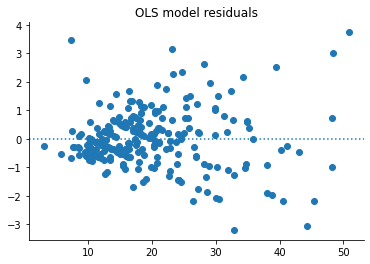

In [31]:
#Plot OSL model
plt.scatter(df.total_bill, df.residual)
plt.axhline(y= 0, ls =':')
plt.title('OLS model residuals');

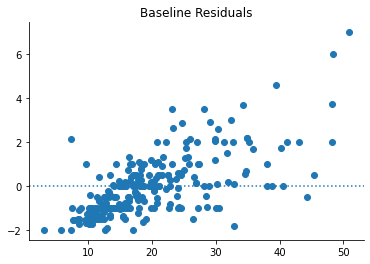

In [32]:
#Plot Baseline Residual
plt.scatter(df.total_bill, df.baseline_residual)
plt.axhline(y= 0, ls = ":")
plt.title('Baseline Residuals');

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



#### <font color="darkgreen">Sum of Squared Errors(SEE)</font>

In [37]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2
df.head(5)

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [42]:
SSE =sum(df['residual^2'])
SSE_baseline = sum(df['baseline_residual^2'])


In [45]:
print("SSE = ", SSE)
print("SSE  baseline = ", SSE_baseline)

SSE =  252.78874385077603
SSE  baseline =  465.21247704918085


* `SSE model performs better than the baseline`

#### <font color="darkgreen">Mean Squared Error(MSE)</font>

In [44]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)


In [46]:
print("MSE = ", MSE)
print("MSE  baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE  baseline =  1.9066085124966428


* `MSE model performs better than baseline model`

### <font color="darkgreen">Root Mean Suared Error(RMSE)</font>

In [47]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

In [48]:
print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


* `RMSE model performs better than the baseline`

### <font color="darkgreen"> Total Sum of Squares(TSS)</font>

In [50]:
TSS = SSE_baseline = df['baseline_residual^2'].sum()  
TSS

465.2124770491804

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).



#### <font color="darkgreen">Sum of Squared Errors(SEE)</font>

In [58]:
SSE = df['residual^2'].sum()
print("SSE Baseline = ", SSE_baseline)

SSE Baseline =  465.2124770491804


### <font color="darkgreen">Mean Squared Error(MSE)</font>

In [59]:
abs(df.baseline_residual).mean()

1.0330186777747912

### <font color="darkgreen">Root Mean Suared Error(RMSE)</font>

In [60]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

In [64]:
from math import sqrt
RMSE = sqrt(MSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE baseline =  1.3807999538298958


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

### 7. What is the amount of variance explained in your model?

### 8. Is your model significantly better than the baseline model?

### 9. Create a file named `evaluate.py` that contains the following functions.

   * **plot_residuals(y, yhat)Z**: creates a residual plot
   * **regression_errors(y, yhat)**: returns the following values:
        * sum of squared errors (`SSE`)
        * explained sum of squares (`ESS`)
        * total sum of squares (`TSS`)
        * mean squared error (`MSE`)
        * root mean squared error (`RMSE`)
   * **baseline_mean_errors(y)**: computes the SSE, MSE, and RMSE for the baseline model
   * **better_than_baseline(y, yhat)**: returns true if your model performs better than the baseline, otherwise false
   * **model_significance(ols_model)**: that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)


### 10. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this